In [1]:
import pandas as pd
import numpy as np
import ast

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ITEM_ID = 'asin'
USER_ID = 'reviewerID'
REVIEW_TEXT = 'reviewText'
KEYPHRASE = 'keyVector'

# CDsVinyl Dataset

In [3]:
cur_df = pd.read_csv('../data/CDsVinyl/Data.csv')
cur_df[REVIEW_TEXT] = cur_df[REVIEW_TEXT].astype('str')
cur_df[USER_ID] = cur_df[USER_ID].astype('str')
cur_df[ITEM_ID] = cur_df[ITEM_ID].astype('str')
cur_df[KEYPHRASE] = cur_df[KEYPHRASE].apply(lambda key: ast.literal_eval(key))
cur_df.head()

,reviewerID,asin,overall,unixReviewTime,reviewText,review,conca_review,keyVector,keyphrases_indices_length,UserIndex,ItemIndex,Binary
0,A2GANR9I6XHTU9,0780018664,4.0,1169337600,Filmed in 1931 this is the first serial killer...,"['filmed', 'first', 'serial', 'killer', 'movie...",filmed first serial killer movie story serial...,[],0,2353,0,1
1,ANCOMAI0I7LVG,0780018664,5.0,1213574400,My feelings for this iconic piece of filmmakin...,"['feeling', 'iconic', 'piece', 'filmmaking', '...",feeling iconic piece filmmaking mirror previo...,[12],1,5482,0,1
2,A1GGOC9PVDXW7Z,0780018664,5.0,1268524800,The title M comes from a chalk mark (for 'murd...,"['title', 'come', 'chalk', 'mark', 'murderer',...",title come chalk mark murderer placed beggar ...,[12],1,755,0,1
3,A62G4QX6XQVLP,0780018664,5.0,1165190400,This film is easily in the Top 5 of Fritz Lang...,"['film', 'easily', 'top', 'fritz', 'lang', 'be...",film easily top fritz lang best film quite po...,"[12, 33]",2,4781,0,1
4,A2ILOYARQVO4K1,0780018664,4.0,989193600,"Dark, disturbingly satirical, humorous exactly...","['dark', 'disturbingly', 'satirical', 'humorou...",dark disturbingly satirical humorous exactly ...,[5],1,2466,0,1


In [4]:
keyphrase_index_list = cur_df[KEYPHRASE].values
keyphrase_index_flatten_list = [item for sublist in keyphrase_index_list for item in sublist]
# keyphrase_index_flatten_list

In [5]:
keyphrase_count = pd.DataFrame.from_dict({'keyphrase': keyphrase_index_flatten_list, 
                        'count': np.ones(len(keyphrase_index_flatten_list))}).groupby(['keyphrase'])['count'].sum().to_frame().reset_index().sort_values('count', ascending=False)
keyphrase_count = keyphrase_count.reset_index(drop=True).reset_index()

In [6]:
keyphrase_count['count'] = keyphrase_count['count'] / len(cur_df)
# keyphrase_count

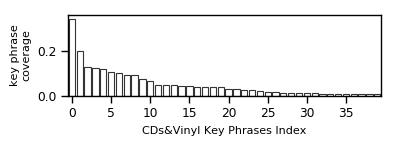

In [7]:
# fig9 = plt.figure(figsize=(3, 3), dpi=100)
# ax9 = fig9.add_subplot(111)

# plt.rcParams["axes.labelsize"] = 8
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})  

fig, ax = plt.subplots(figsize=(4, 1.5), dpi=100)
ax = sns.barplot(x="index", y='count', data=keyphrase_count, color="white", edgecolor=".2")

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# ax.set_xlim(0,40)
# ax.set_ylim(0,0.4)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# ax.set_xlim(1,40)
# ax.set_xticks(range(1,40,5))

ax.set_xlabel("CDs&Vinyl Key Phrases Index")
ax.set_ylabel("key phrase\ncoverage")
# legend = plt.legend(loc='upper right', shadow=True, fontsize=10)
# legend = plt.legend(shadow=True, fontsize=10)
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
fig_path = '../figs'
name = 'CDsVinyl_keyphrase_coverage'
fig.savefig('{0}/{1}.pdf'.format(fig_path, name), bbox_inches="tight", pad_inches=0, format='pdf')

# Beer Dataset

In [8]:
cur_df = pd.read_csv('../data/beer/Data.csv')

cur_df['review/text'] = cur_df['review/text'].astype('str')
cur_df[KEYPHRASE] = cur_df[KEYPHRASE].apply(lambda key: ast.literal_eval(key))
cur_df.head()

,beer/ABV,beer/name,beer/style,review/overall,review/text,review/timeUnix,user/profileName,Binary,UserIndex,ItemIndex,review,conca_review,keyVector,keyphrases_indices_length
0,5.5,Caldera Pale Ale,American Pale Ale (APA),4.0,Caldera- Pale Ale\t\tPicked up at Grape & Gour...,1251327677,NJpadreFan,0,1767,659,"['caldera', 'pale', 'ale', 'picked', 'grape', ...",caldera pale ale picked grape gourmet vb ligh...,"[1, 7, 12, 14, 16, 29, 31, 34, 39, 40, 42, 45]",12
1,5.5,Caldera Pale Ale,American Pale Ale (APA),2.5,12 oz. can poured into a pint glass. I really ...,1250928902,vacax,0,6159,659,"['oz', 'poured', 'pint', 'glass', 'really', 'l...",oz poured pint glass really like beer like pa...,"[1, 16, 18, 20, 24, 39, 42, 43, 45, 55]",10
2,5.5,Caldera Pale Ale,American Pale Ale (APA),4.0,A: Pours a cloudy orange with a crisp white tw...,1249866208,d0ggnate,0,3516,659,"['pours', 'cloudy', 'orange', 'crisp', 'white'...",pours cloudy orange crisp white two finger he...,"[12, 36, 39, 42]",4
3,5.5,Caldera Pale Ale,American Pale Ale (APA),4.5,Received this can through Beer Powerball. I am...,1249847121,babyhobbes,1,2893,659,"['received', 'beer', 'powerball', 'really', 's...",received beer powerball really sorry nt know ...,"[12, 42]",2
4,5.5,Caldera Pale Ale,American Pale Ale (APA),4.5,355ml can bought from Beersofeurope.com...\t\t...,1249556277,mdagnew,1,4858,659,"['bought', 'beersofeurope', 'com', 'poured', '...",bought beersofeurope com poured golden yellow...,"[1, 5, 7, 12, 14, 16, 18, 19, 26, 31, 34, 40, ...",18


In [9]:
keyphrase_index_list = cur_df[KEYPHRASE].values
keyphrase_index_flatten_list = [item for sublist in keyphrase_index_list for item in sublist]
# keyphrase_index_flatten_list

In [10]:
keyphrase_count = pd.DataFrame.from_dict({'keyphrase': keyphrase_index_flatten_list, 
                        'count': np.ones(len(keyphrase_index_flatten_list))}).groupby(['keyphrase'])['count'].sum().to_frame().reset_index().sort_values('count', ascending=False)
keyphrase_count = keyphrase_count.reset_index(drop=True).reset_index()

In [11]:
keyphrase_count['count'] = keyphrase_count['count'] / len(cur_df)
# keyphrase_count

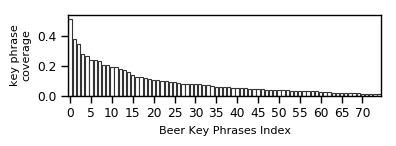

In [12]:
# fig9 = plt.figure(figsize=(3, 3), dpi=100)
# ax9 = fig9.add_subplot(111)

sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})  

fig, ax = plt.subplots(figsize=(4, 1.5), dpi=100)
ax = sns.barplot(x="index", y='count', data=keyphrase_count, color="white", edgecolor=".2")

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# ax.set_xlim(0,75)
# ax.set_ylim(0,0.55)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_xlabel("Beer Key Phrases Index")
ax.set_ylabel("key phrase\ncoverage")
# legend = plt.legend(loc='upper right', shadow=True, fontsize=10)
# legend = plt.legend(shadow=True, fontsize=10)
handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
fig_path = '../figs'
name = 'beer_keyphrase_coverage'
fig.savefig('{0}/{1}.pdf'.format(fig_path, name), bbox_inches="tight", pad_inches=0, format='pdf')